In [14]:
import csv
f= open("./Data/seoul.csv") # seoul.csv 파일 읽기 모드로 불러옴
data = csv.reader(f) # csv 파일 자체가 ,로 나눠져 있어서 생략하면 
                      #기본으로 가져오기때문에 문제 없음
header = next(data) # 첫번째 행(제목행) header 변수 저장
print(header)
print()

max_tem = 0
max_dat = ""

for row in data:
    if row[-5] !="":
        if float(row[4])>max_tem:
            max_tem = float(row[-5])
            max_day = row[-1]
    
print(f'최고기온 : {max_tem}, 날씨: {max_day}')
f.close()

['\t\t지점번호', '지점명', '일시', '평균기온(℃)', '평균최고기온(℃)', '최고기온(℃)', '\t최고기온일자', '평균최저기온(℃)', '최저기온(℃)', '최저기온일자']

최고기온 : 37.4, 날씨: 1924-08-30


### matplotlib 라이브러리를 이용한 시각화

- 파이썬 시각화 모듈
- 2D 형테의 그래프, 이미지 등을 사용할 때 적용
- 실제 과학 컴퓨팅 연구 분야나 인공지능 연구 분야에서도 많이 활용
- https://matplotlib.org/

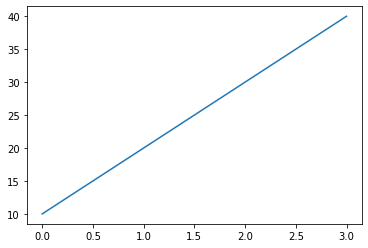

In [21]:
import matplotlib.pyplot as plt
# from matplot import pyplot as plt 와 같은의미

# plt.plot(x axiss, y axis)
# 교재 4장 참조

plt.plot([10, 20, 30, 40]) #메모리에 차트(꺽은선 graph) 생성
plt.show() #메모리에 생선된 차트를 화면에 나타나게 해줌

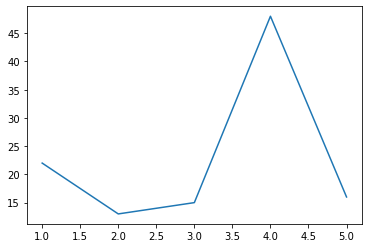

In [23]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [22, 13, 15, 48, 16]

plt.plot(x, y) # creat value of x axis and y axis
plt.show()

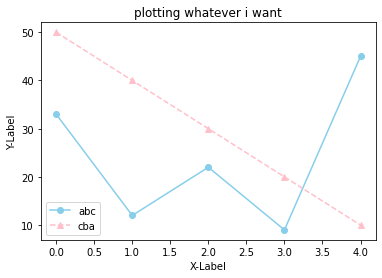

In [31]:
#plt 영역에여러 개의 차트 및 내용 표시
import matplotlib.pyplot as plt

plt.plot([33, 12, 22, 9, 45], label='abc', color='skyblue', marker='o') #chart no.1 and option
plt.plot([50, 40, 30, 20, 10], 'pink', label="cba", marker='^', linestyle = '--')#chart no.2 and option
# 순서랑 상관 없이 label = '', color= '', 이런식으로 옵션을 입력해라

plt.title('plotting whatever i want') # chart name
plt.xlabel('X-Label') #x axis namep
plt.ylabel('Y-Label') #y axis name
plt.legend() #print label
plt.show()

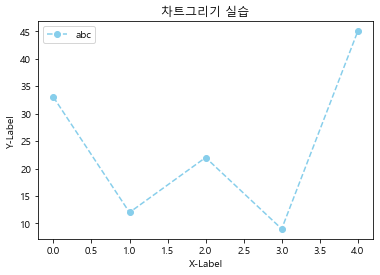

In [41]:
#plt 차트에서 한글 지원 방법 1
#전체에 대해서 폰트속성 변경
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
#from matplotlib import as fm과 같은 문법
#from matplotlib import rc 를 활용해도 됨 rc를 활용할거냐 아니면 fm을 활용하여 각각 관리할거냐

# 폰트의 위치, 한글 폰트만 활용가능
# 그중에서도 속성에서 truetype만 활용가능
font_path = "C:/Windows/Fonts/malgun.ttf" #한글 폰드 경로 및 이름 정의(window10 기반)
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name) # 차트 전체 폰트 속성 변경

plt.plot([33, 12, 22, 9, 45], label='abc', color='skyblue', 
         marker='o', linestyle = '--') #chart no.1 and option

# 순서랑 상관 없이 label = '', color= '', 이런식으로 옵션을 입력해라

plt.title('차트그리기 실습') # chart name
plt.xlabel('X-Label') #x axis namep
plt.ylabel('Y-Label') #y axis name
plt.legend() #print label
plt.show()

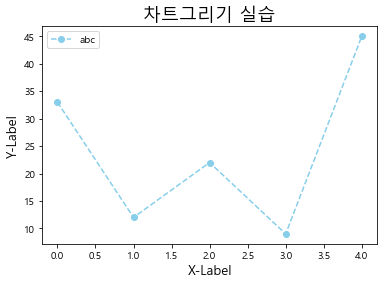

In [43]:
#plt 차트에서 한글 지원 방법 2
#개별 폰트속성 변경
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = "C:/Windows/Fonts/malgun.ttf" 
font_name1 = fm.FontProperties(fname=font_path, size = 18) # 기본 폰트 및 사이즈 정의
font_name2 = fm.FontProperties(fname=font_path, size = 13)

plt.plot([33, 12, 22, 9, 45], label='abc', color='skyblue', 
         marker='o', linestyle = '--') 

plt.title('차트그리기 실습', fontproperties=font_name1) # 차트에 font_name 적용
plt.xlabel('X-Label', fontproperties=font_name2) #x axis namep
plt.ylabel('Y-Label', fontproperties=font_name2) #y axis name
plt.legend() #print label
plt.show()

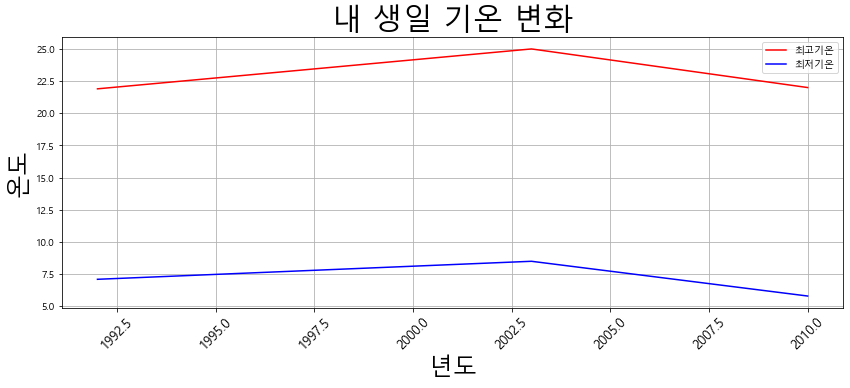

In [83]:
#['\t\t지점번호', '지점명', '일시', '평균기온(℃)', 
#'평균최고기온(℃)', '최고기온(℃)', '\t최고기온일자', 
#'평균최저기온(℃)', '최저기온(℃)', '최저기온일자']
# 날짜데이터(row[-1])를 가져와, "-"를 기준으로 글자 나누기
# 생일에 따른 년도별 최고기온/최저기온 차트 출력

import csv
import matplotlib.pyplot as plt

f= open("./Data/seoul.csv")
data = csv.reader(f)  
header = next(data) 

max_temp = []
min_temp = []
year_temp = []

for row in data:
    
    pre_max_temp=[]
    pre_min_temp=[]
    pre_year_temp=[]
    
    if row[-1] != "":
        if int(row[-1].split('-')[0]) >= 1985:
            if row[-1][-5:]=="05-01":
                
                pre_max_temp.append(float(row[4]))
                pre_min_temp.append(float(row[-2]))
                pre_year_temp.append(int(row[-1].split('-')[0]))
                max_temp.append(pre_max_temp)
                min_temp.append(pre_min_temp)
                year_temp.append(pre_year_temp)

# 데이터를 이용한 시각화

plt.figure(figsize=(14, 5)) # 차트 크기 설정 (width size, legth size)                
plt.plot(year_temp, max_temp, label="최고기온", color = 'r')
plt.plot(year_temp, min_temp, label="최저기온", color = 'b')

plt.xticks(size = 13, rotation = 45 ) # x_xais_value 글자크기, 회전을 조정

plt.title('내 생일 기온 변화', size = 30)
plt.xlabel('년도', size = 24)
plt.ylabel('온도', size = 24)
plt.legend(loc='best') # best(가장 적절한 위치), lower right, upper left
plt.grid(True) # grid 표시


plt.show()

In [11]:
import csv
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

f=open("./Data/seoul.csv")
data=csv.reader(f)
header=next(data)
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

mean_temp1=[]
mean_temp2=[]
year_temp = []
year_temp2 = []

for row in data:
    if row[-1]!="":
        if int(row[-1].split('-')[0])>= 1960 and int(row[-1].split('-')[0])<=2020:
            if row[-1][-5:] == "01-15":
                
                mean_temp1.append(float(row[3]))
                year_temp.append(row[-1].split('-')[0])

            if row[-1][-5:] == "08-15":
                mean_temp2.append(float(row[3]))
                year_temp2.append(row[-1].split('-')[0])

# 데이터를 이용한 시각화

plt.figure(figsize=(14, 5)) # 차트 크기 설정 (width size, legth size)                
plt.plot(year_temp, mean_temp1, label="1월", color = 'r')
plt.plot(year_temp2, mean_temp2, label="8월", color = 'b')

plt.xticks(size = 13, rotation = 45 ) # x_xais_value 글자크기, 회전을 조정

plt.title('년도별 1월/8월 평균기온 변화', size = 30)
plt.xlabel('년도', size = 24)
plt.ylabel('온도', size = 24)
plt.legend(loc='best') # best(가장 적절한 위치), lower right, upper left
plt.grid(True) # grid 표시


plt.show()

ValueError: invalid literal for int() with base 10: '12.8'

### 히스토그램

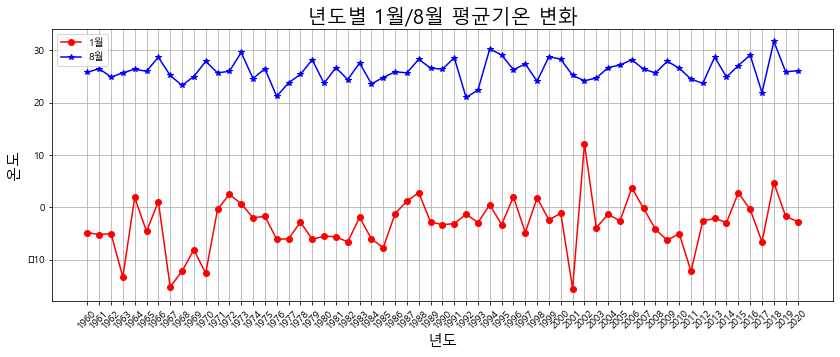

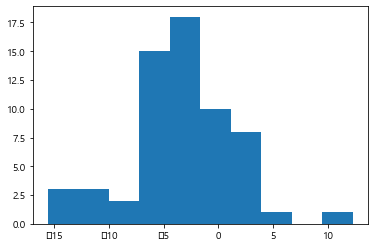

In [13]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import csv
  
font_name=fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() 
plt.rc('font', family=font_name)

f=open('./data/seoul.csv', encoding='cp949')   
data=csv.reader(f)
header=next(data)

temp_1=[]    # 최고기온
temp_8=[]    # 최저기온
year_temp=[]   # 생일자 년도

for row in data:
    if row[2] !="":
        if int(row[2].split('-')[0]) >= 1960 and int(row[2].split('-')[0]) <= 2020 :
            # 1960년 이후부터 2020년까지의 데이터 검색
            if row[2][-5:]=="01-15":            # 1월 15일 데이터만 추출
                temp_1.append(float(row[3]))
                
            if row[2][-5:]=="08-15":            # 8월 15일 데이터만 추출
                temp_8.append(float(row[3]))
                year_temp.append(row[2].split('-')[0])  # 년도 데이터 추출

                
# 데이터를 이용한 시각화

plt.figure(figsize=(14, 5))  # 차트 크기 설정
plt.plot(year_temp, temp_1, label='1월', color='r', marker="o")
plt.plot(year_temp, temp_8, label='8월', color='b', marker='*')

plt.xticks(size=10, rotation=45)   # x축 라벨에 대한 회전, 글자크기, 'vertical' 90도

plt.title('년도별 1월/8월 평균기온 변화', size=20)
plt.xlabel('년도', size=15)
plt.ylabel('온도', size=15)
plt.legend(loc='best')   # best, lower right, ...
plt.grid(True)     # 그림 영역에 그리드 표시

plt.show()
plt.hist(temp_1)
plt.show()

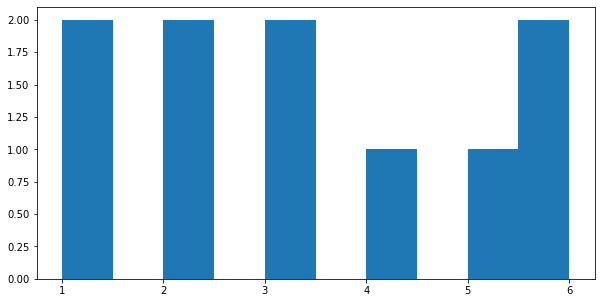

In [10]:
import numpy as np
import matplotlib.pyplot as plt

Dice_num=[np.random.randint(1,7) for i in range(10)]
    
plt.figure(figsize=(10, 5))
plt.hist(Dice_num)
plt.show()


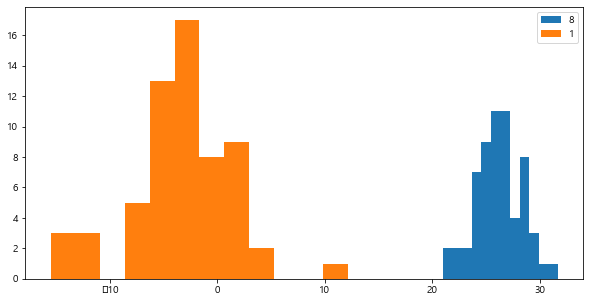

In [20]:
plt.figure(figsize=(10, 5))
plt.hist(temp_8, bins=12, label = '8') #bins는 구간을 나타낸다
plt.hist(temp_1, bins=12, label = '1')
plt.legend(loc='best')
plt.show()

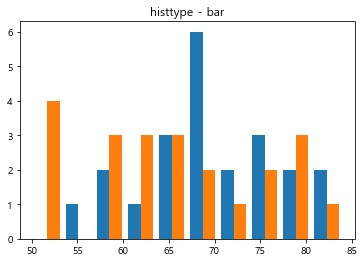

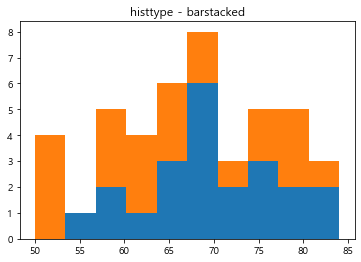

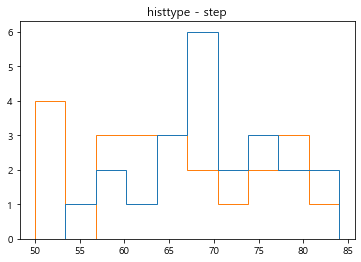

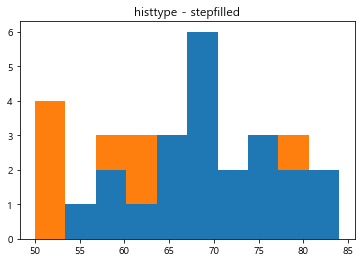

In [23]:
weight = [68, 81, 64, 56, 78, 74, 61, 77, 66, 68, 59, 71,
        80, 59, 67, 81, 69, 73, 69, 74, 70, 65]
weight2 = [52, 67, 84, 66, 58, 78, 71, 57, 76, 62, 51, 79,
        69, 64, 76, 57, 63, 53, 79, 64, 50, 61]

plt.hist((weight, weight2), histtype='bar')
plt.title('histtype - bar')
plt.figure()


plt.hist((weight, weight2), histtype='barstacked')
plt.title('histtype - barstacked')
plt.figure()


plt.hist((weight, weight2), histtype='step')
plt.title('histtype - step')
plt.figure()


plt.hist((weight, weight2), histtype='stepfilled')
plt.title('histtype - stepfilled')
plt.show()

